In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read CSV File
diamond=pd.read_csv("Diamonds_Prices2022.csv")
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond.shape

(53943, 11)

In [4]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
diamond.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

# Data analysis

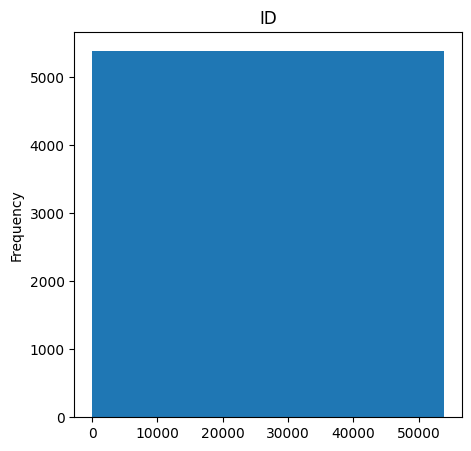

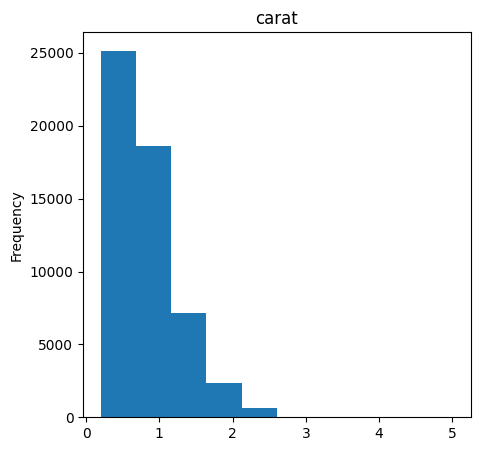

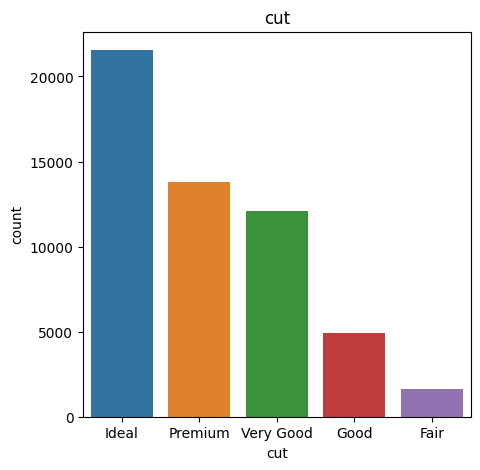

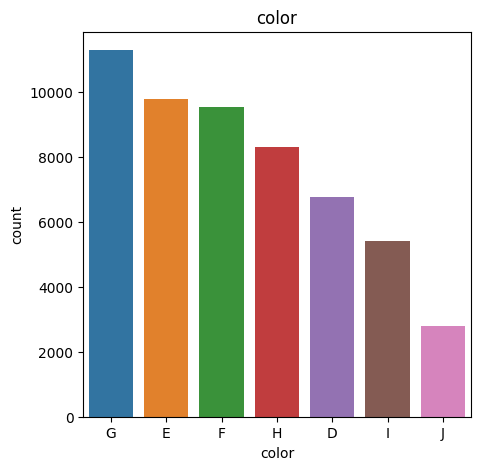

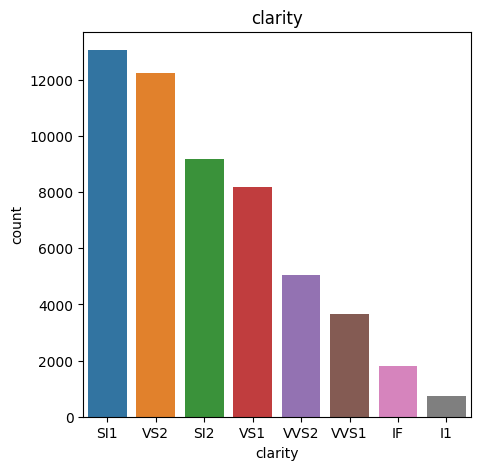

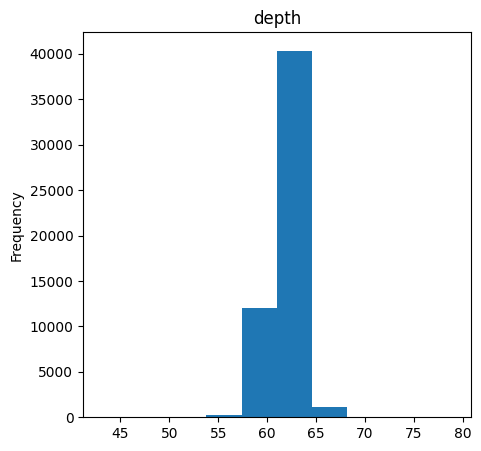

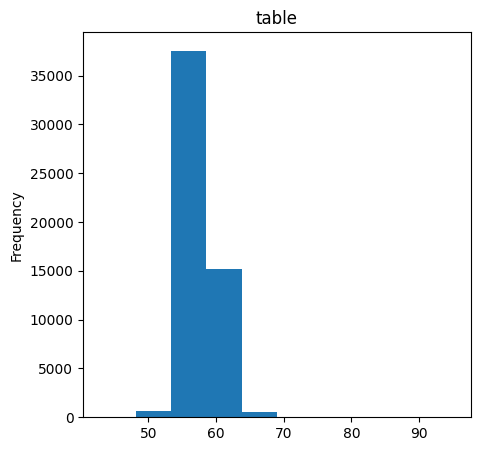

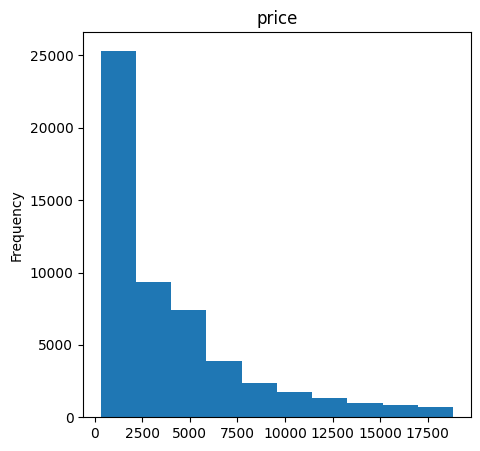

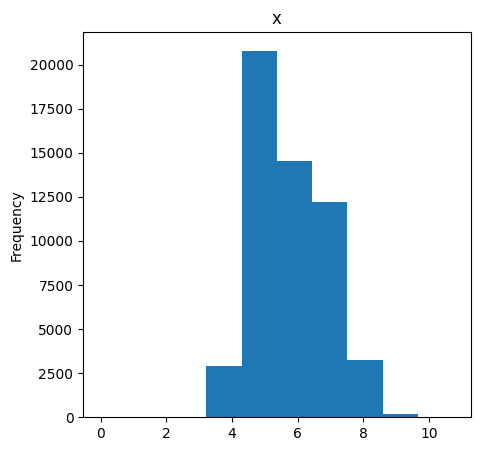

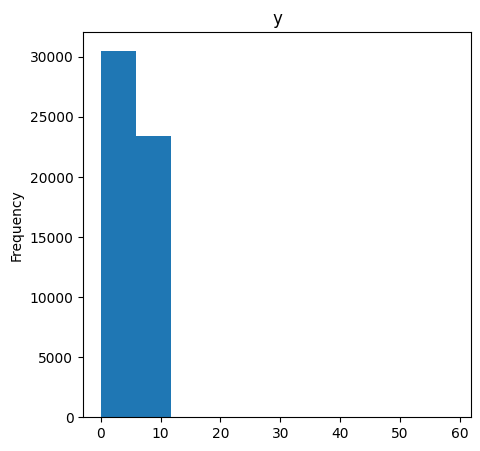

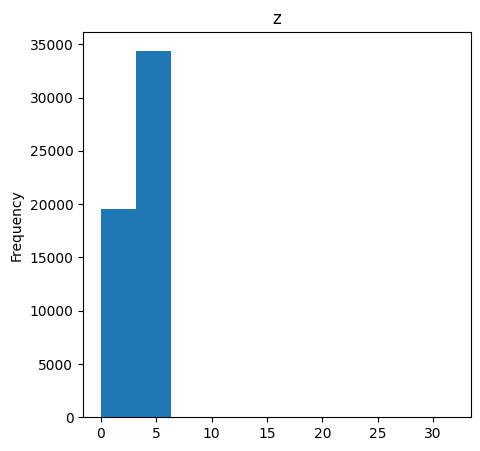

In [6]:
num_col=[]
cat_col=[]
for col in diamond.columns:
    plt.figure(col, figsize=(5,5))
    plt.title(col)
    if is_numeric_dtype(diamond[col]):
        diamond[col].plot(kind="hist")
        num_col.append(col)
    if is_string_dtype(diamond[col]):
        sns.countplot(x=col, data=diamond, order=diamond[col].value_counts().index)
        plt.show()
        cat_col.append(col)

The price is left skewed so we will log transform it to be closer to a normal distribution.

# Multi-variate analysis

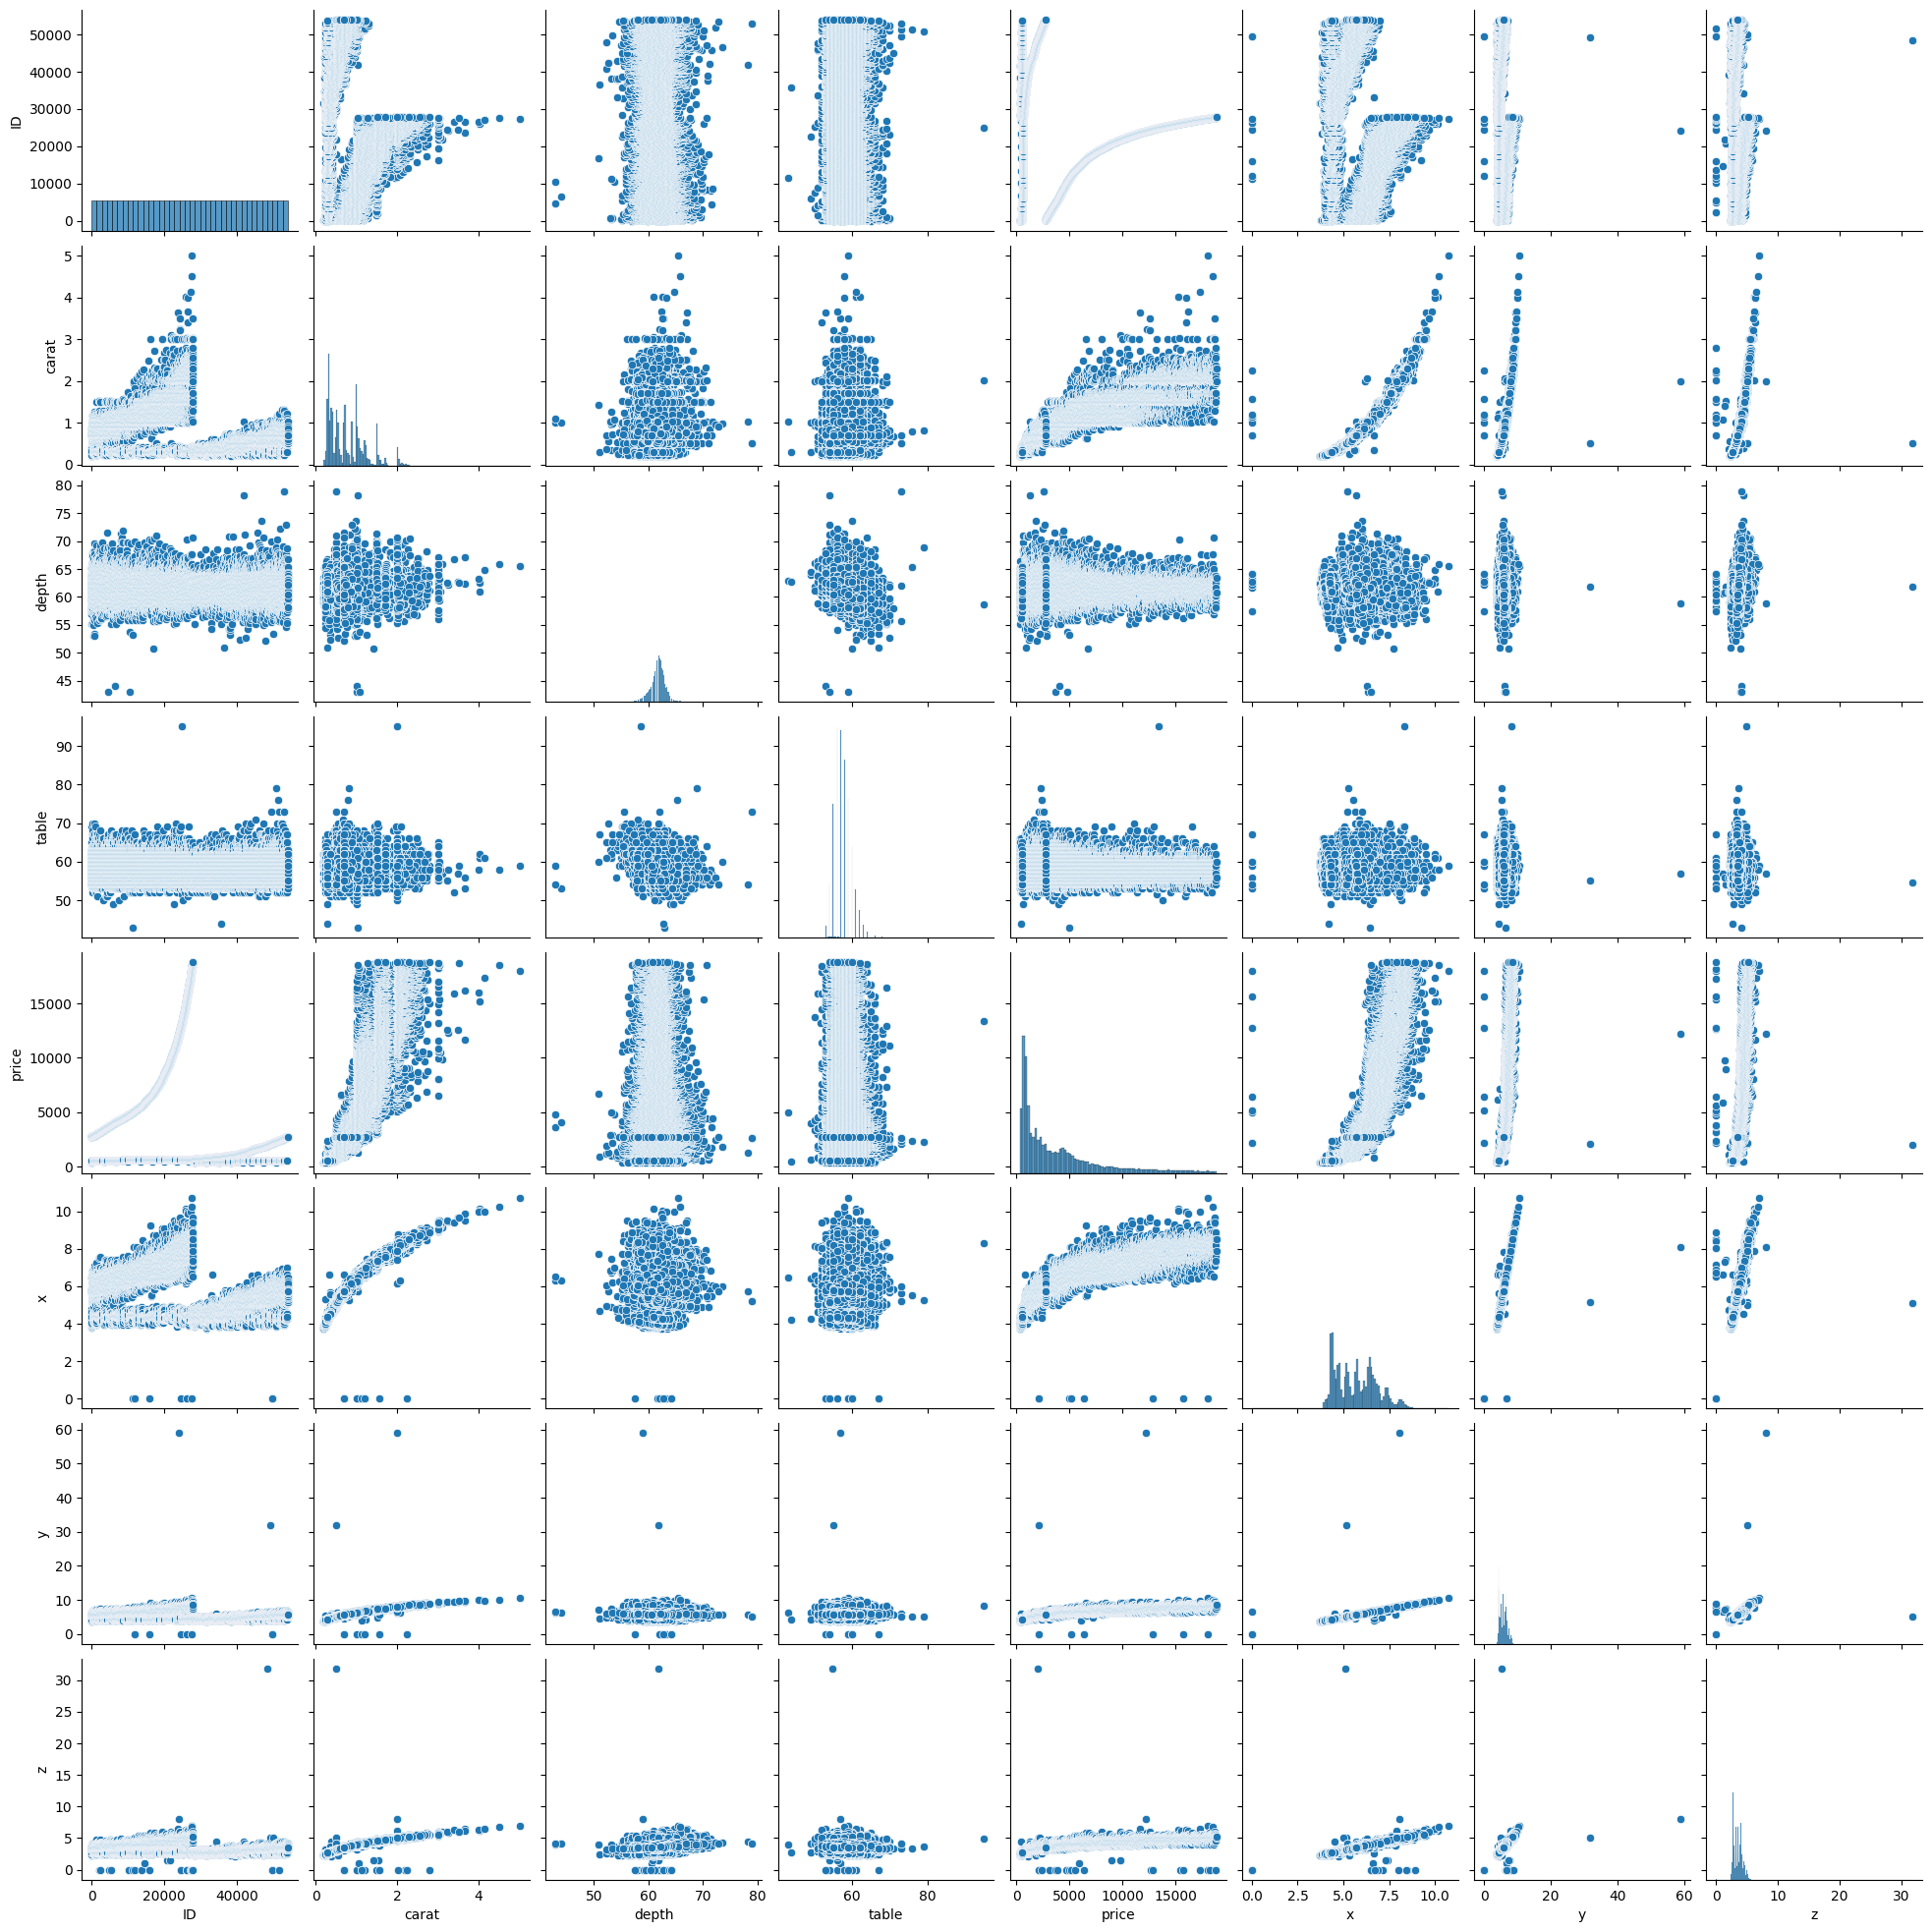

In [7]:
sns.pairplot(diamond)
plt.show()

# Data Transformation

## Encodage

In [8]:
for i in cat_col:
    diamond[i]=LabelEncoder().fit_transform(diamond[i])
print(diamond.head())

   ID  carat  cut  color  clarity  depth  table  price     x     y     z
0   1   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   2   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   3   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   4   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   5   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75


<Axes: ylabel='Frequency'>

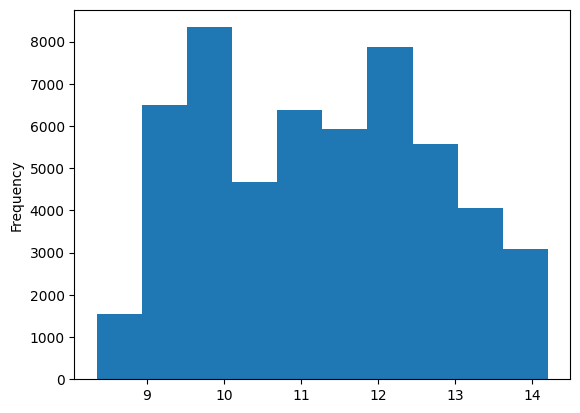

In [9]:
diamond["log_price"]=np.log2(diamond["price"]+1)
diamond["log_price"].plot(kind="hist")

# Correlation analysis

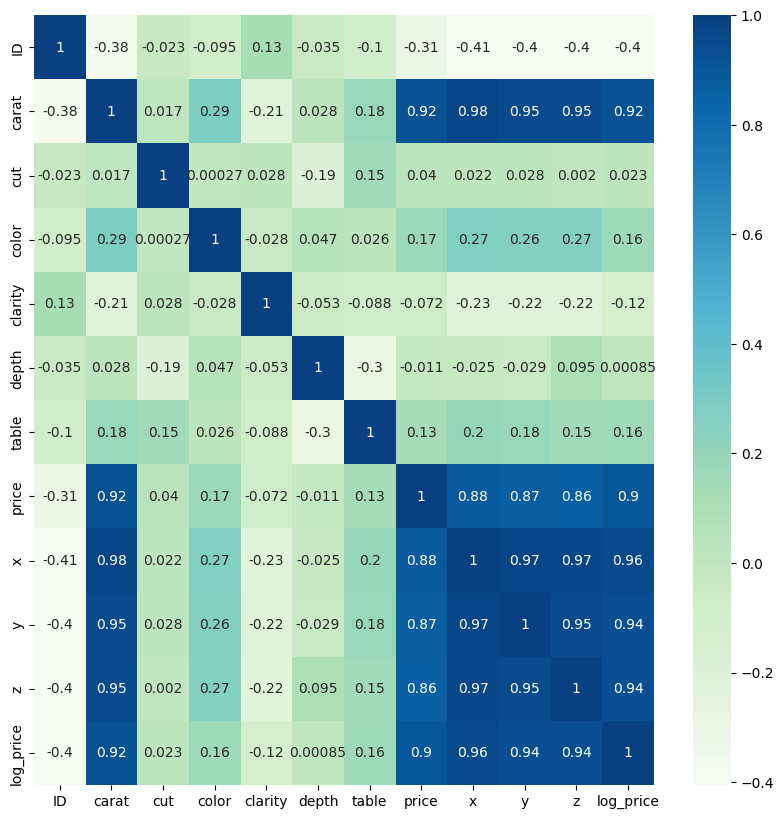

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(diamond.corr(), annot=True, cmap="GnBu")
plt.show()

In [11]:
diamond_corr=diamond.corr()[["log_price"]]
diamond_corr_hi=diamond_corr.loc[diamond_corr["log_price"]>0.5]
print(diamond_corr_hi)

           log_price
carat       0.920252
price       0.895852
x           0.958027
y           0.936190
z           0.935233
log_price   1.000000


In [12]:
X=diamond[['carat','cut','color','clarity', 'x','y','z', 'table', 'depth']]
#VIF DataFrame

vif_data=pd.DataFrame()
vif_data['features']=X.columns

#calculating VIF for each feature
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,carat,71.280065
1,cut,7.452827
2,color,3.656697
3,clarity,6.216646
4,x,1285.983450
5,y,531.811960
6,z,542.248232
7,table,521.205781
8,depth,532.458587


# Split and Save Data

In [13]:
Y=diamond['log_price']
X=diamond[['carat','color','clarity', 'cut','x','y','z', 'table', 'depth']]

In [14]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=7) 

In [15]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [16]:
transformer = StandardScaler().fit(X_train)

In [17]:
X_train_prepared = transformer.transform(X_train)
X_test_prepared = transformer.transform(X_test)

In [18]:
muY = np.mean(Y_train); sigmaY = np.std(Y_train)
minY = np.min(Y_train); maxY = np.max(Y_train); diff=maxY-minY

In [19]:
Y_train_prepared = (Y_train-minY)/diff
Y_test_prepared = (Y_test-minY)/diff

In [20]:
X_train_prepared.shape

(37760, 9)

In [21]:
X_test_prepared.shape

(16183, 9)

In [64]:
np.savetxt('diamonds_inputs_train.csv', X_train_prepared, delimiter=",")
#np.savetxt('diamonds_outputs_train.csv', Y_train, delimiter=",")
np.savetxt('diamonds_outputs_train.csv', Y_train_prepared, delimiter=",")
np.savetxt('diamonds_inputs_test.csv', X_test_prepared, delimiter=",")
#np.savetxt('diamonds_outputs_test.csv', Y_test, delimiter=",")
np.savetxt('diamonds_outputs_test.csv', Y_test_prepared, delimiter=",")

In [23]:
print(np.mean(Y_train_prepared))
print(np.mean(Y_test_prepared))
print(np.median(Y_train_prepared))
print(np.median(Y_test_prepared))

0.49325826728116207
0.4918856661200618
0.4934478250851597
0.49046826723650583


In [68]:
np.min(Y_test_prepared)

0.0007533905532180802

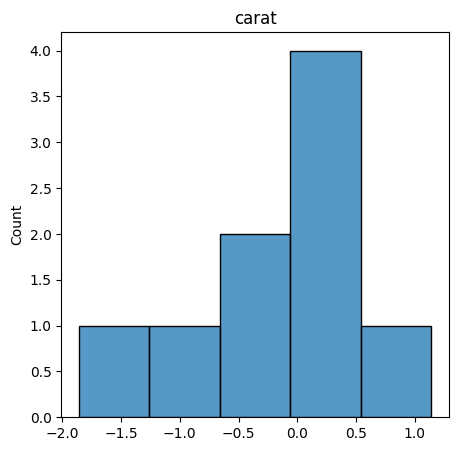

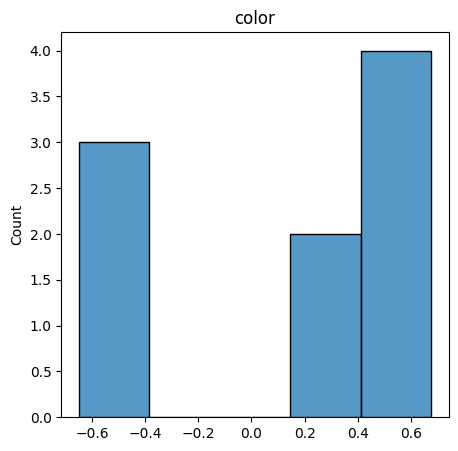

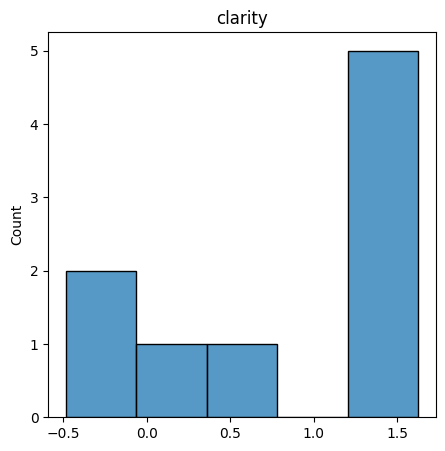

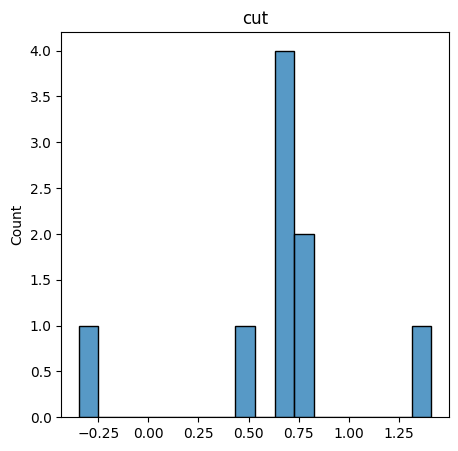

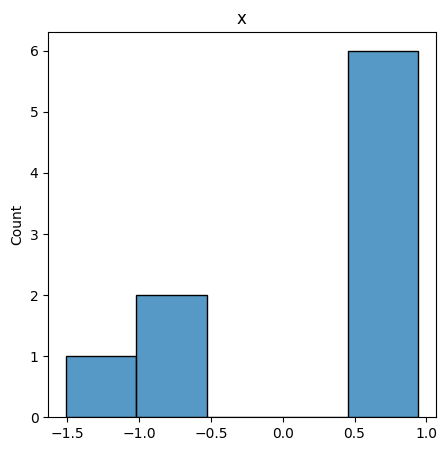

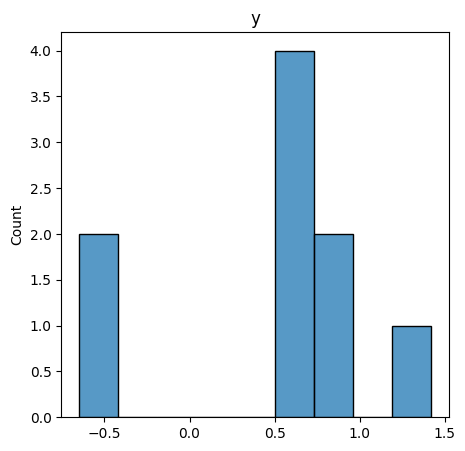

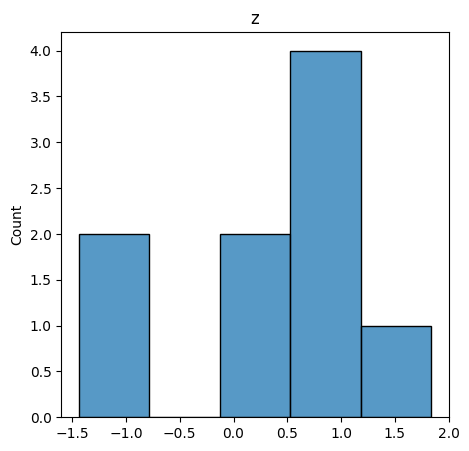

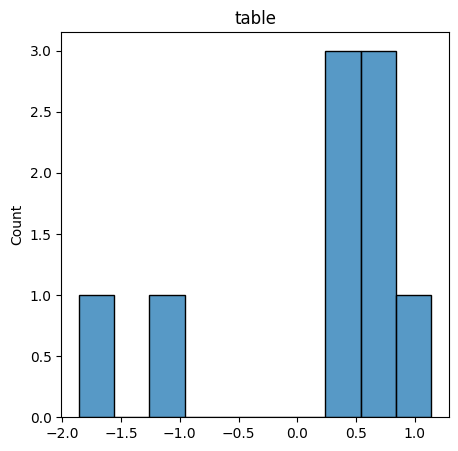

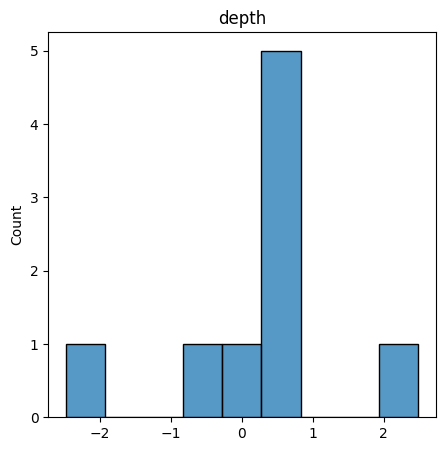

In [69]:
num_col=[]
cat_col=[]
i=0
for col in X_train.columns:
    plt.figure(col, figsize=(5,5))
    plt.title(col)
    if is_numeric_dtype(X_train[col]):
        sns.histplot(X_train_prepared[i])
        num_col.append(col)
        i+=1

<AxesSubplot:xlabel='log_price', ylabel='Count'>

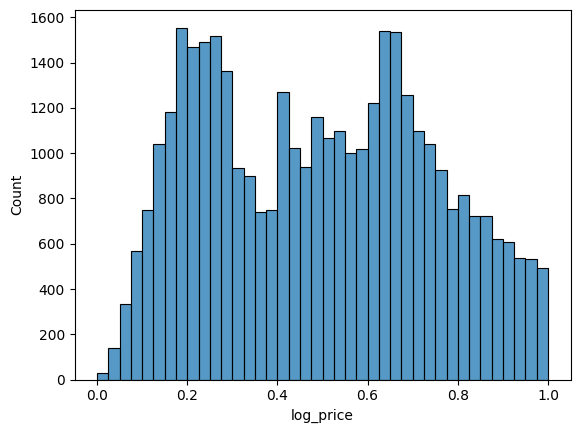

In [70]:
sns.histplot(Y_train_prepared)